**The Elon Musk-Inspired Concept: Hyperloop Vision**

In [1]:
!pip install Pillow

In [9]:
import numpy as np
from PIL import Image
from google.colab import files
import requests
from io import BytesIO

url = "https://startse-uploader.s3.us-east-2.amazonaws.com/medium_c5240366_937a_49d8_9622_8b6d2bc9866c_1280x854_e8c6a8219c.webp"
response = requests.get(url)


if response.status_code == 200:
    print(f"Content type: {response.headers['Content-Type']}")
    original_image = Image.open(BytesIO(response.content))
    print("Image loaded successfully from URL.")
else:
    print(f"Failed to load image from URL. Status code: {response.status_code}")
    original_image = None

Content type: image/webp
Image loaded successfully from URL.


# Downsampling
(Max, Average, Medium)

Original Image:


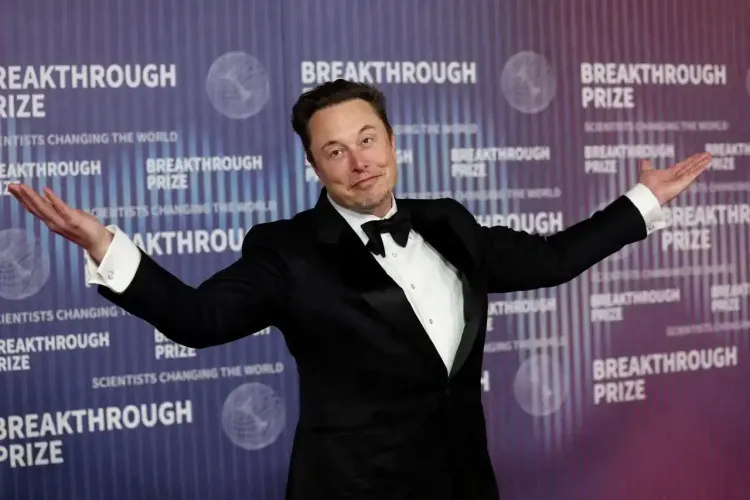


Down-sampled (LANCZOS - sharper):


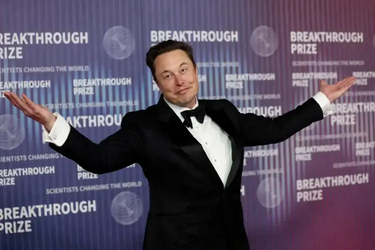

In [11]:
new_size = (original_image.width // 2, original_image.height // 2) # Halve the dimensions

downsampled_lanczos = original_image.resize(new_size, Image.Resampling.LANCZOS)


print("Original Image:")
display(original_image)

print("\nDown-sampled (LANCZOS - sharper):")
display(downsampled_lanczos)




Down-sampled (BICUBIC - smoother):


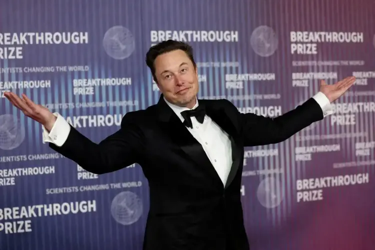

In [12]:
downsampled_bicubic = original_image.resize(new_size, Image.Resampling.BICUBIC)
print("\nDown-sampled (BICUBIC - smoother):")
display(downsampled_bicubic)



Down-sampled (Max Pooling):


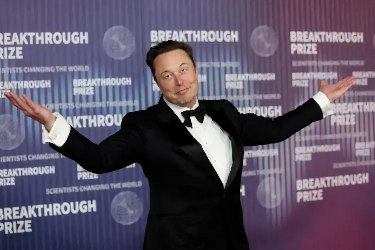


Down-sampled (Average Pooling):


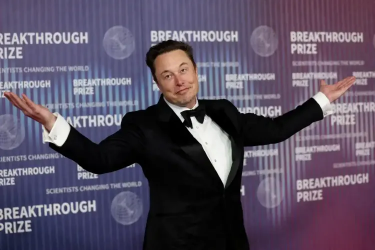


Down-sampled (Median Pooling):


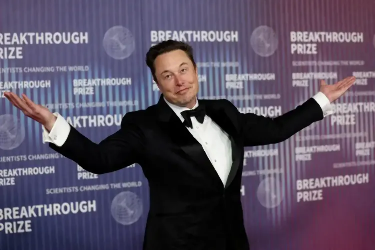

In [13]:
original_array = np.array(original_image)

pool_size = (2, 2)

def pooling(image_array, pool_size, method='max'):
    h, w, c = image_array.shape
    ph, pw = pool_size
    new_h = h // ph
    new_w = w // pw
    reshaped_array = image_array[:new_h*ph, :new_w*pw, :].reshape(new_h, ph, new_w, pw, c)

    if method == 'max':
        pooled_array = reshaped_array.max(axis=(1, 3))
    elif method == 'average':
        pooled_array = reshaped_array.mean(axis=(1, 3)).astype(np.uint8) # Convert back to uint8
    elif method == 'median':
        pooled_array = np.median(reshaped_array, axis=(1, 3)).astype(np.uint8) # Convert back to uint8
    else:
        raise ValueError("Invalid pooling method. Choose 'max', 'average', or 'median'.")

    return Image.fromarray(pooled_array)

# Perform Max Pooling
downsampled_max_pooling = pooling(original_array, pool_size, method='max')

# Perform Average Pooling
downsampled_average_pooling = pooling(original_array, pool_size, method='average')


downsampled_median_pooling = pooling(original_array, pool_size, method='median')

print("\nDown-sampled (Max Pooling):")
display(downsampled_max_pooling)

print("\nDown-sampled (Average Pooling):")
display(downsampled_average_pooling)

print("\nDown-sampled (Median Pooling):")
display(downsampled_median_pooling)

# Upsampling
(NN, Bilinear, Bicubic)

Up-sampled (NEAREST):


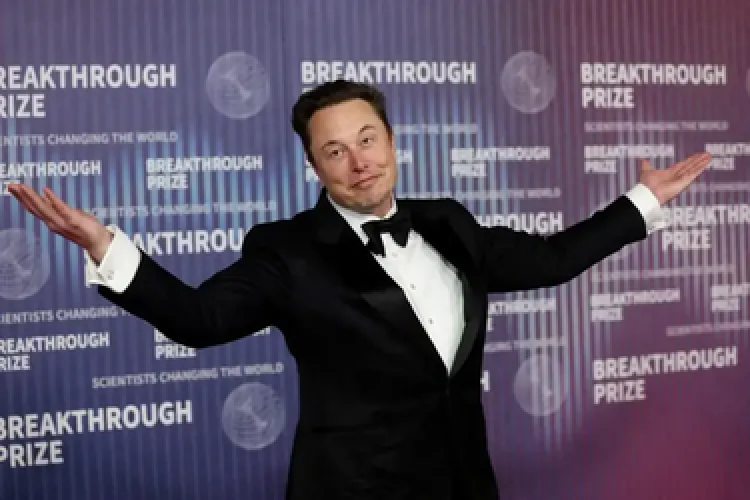


Up-sampled (BICUBIC):


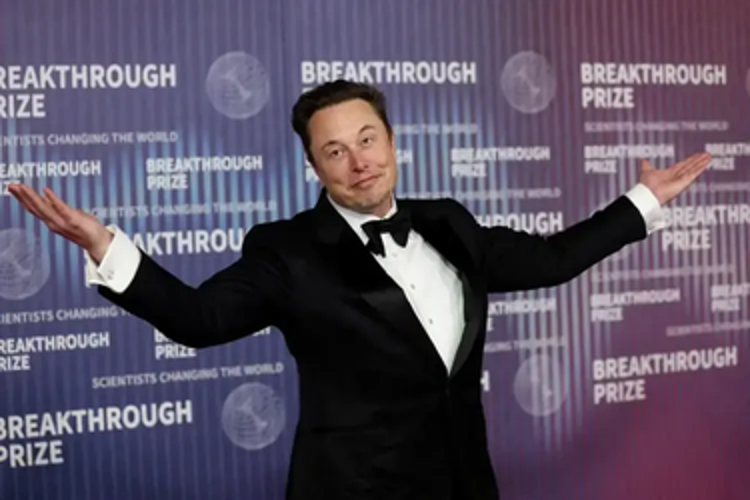

In [16]:
upsample_size = original_image.size

upsampled_nearest = downsampled_lanczos.resize(upsample_size, Image.Resampling.NEAREST)


print("Up-sampled (NEAREST):")
display(upsampled_nearest)



Up-sampled (BILINEAR):


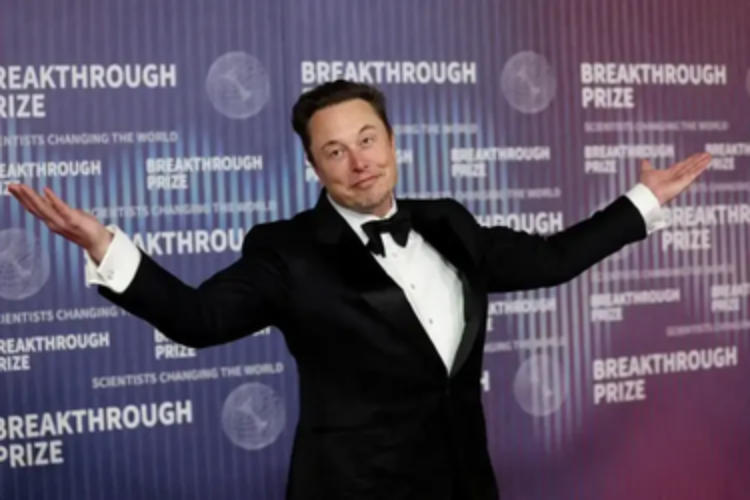

In [15]:
upsampled_bilinear = downsampled_lanczos.resize(upsample_size, Image.Resampling.BILINEAR)

print("\nUp-sampled (BILINEAR):")
display(upsampled_bilinear)


Up-sampled (BICUBIC):


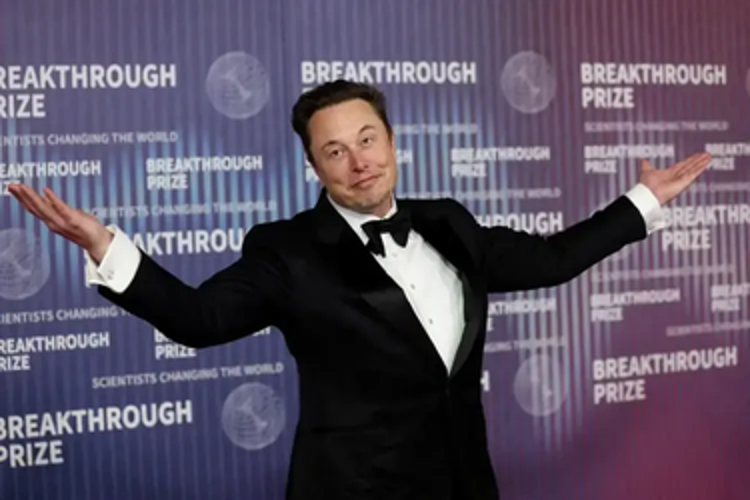

In [17]:
upsampled_bicubic = downsampled_lanczos.resize(upsample_size, Image.Resampling.BICUBIC)


print("\nUp-sampled (BICUBIC):")
display(upsampled_bicubic)


Up-sampled (Bilinear - Custom NumPy Implementation):


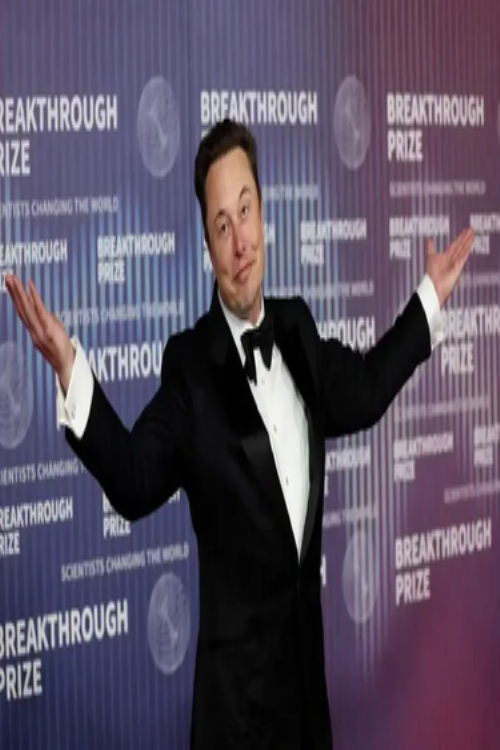

Up-sampled image dimensions: (500, 750)


In [19]:
import numpy as np
from PIL import Image


downsampled_array = np.array(downsampled_lanczos)
h_down, w_down, c = downsampled_array.shape
h_up, w_up = upsample_size

upsampled_bilinear_array = np.zeros((h_up, w_up, c), dtype=np.uint8)

x_scale = w_down / w_up
y_scale = h_down / h_up

for i in range(h_up):
    for j in range(w_up):
        x_down = j * x_scale
        y_down = i * y_scale

        x1, y1 = int(x_down), int(y_down)
        x2, y2 = min(x1 + 1, w_down - 1), min(y1 + 1, h_down - 1)

        fx, fy = x_down - x1, y_down - y1
        w11 = (1 - fx) * (1 - fy)
        w12 = fx * (1 - fy)
        w21 = (1 - fx) * fy
        w22 = fx * fy

        for channel in range(c):
            upsampled_bilinear_array[i, j, channel] = (
                downsampled_array[y1, x1, channel] * w11 +
                downsampled_array[y1, x2, channel] * w12 +
                downsampled_array[y2, x1, channel] * w21 +
                downsampled_array[y2, x2, channel] * w22
            )

upsampled_bilinear_custom = Image.fromarray(upsampled_bilinear_array)

print("\nUp-sampled (Bilinear: Custom NumPy Implementation):")
display(upsampled_bilinear_custom)

print(f"Up-sampled image dimensions: {upsampled_bilinear_custom.size}")

# The Elon Musk-Inspired Concept: Hyperloop Vision System (HVS)

Inspired by Elon Musk's principles of "first principles thinking" and rapid iteration, the Hyperloop Vision System (HVS) is envisioned as a cutting-edge computer vision system for future-tech vehicles like Hyperloop pods or Tesla Optimus robots. The HVS focuses on processing visual data at incredible speeds through dynamic down-sampling and intelligent up-sampling.

## Prioritize and Prune (Down-sampling)

The HVS doesn't process every pixel all the time. Instead, it uses dynamic down-sampling to prioritize and prune data.

*   **Average Pooling (Macro View):** For large, slow-moving objects, the system uses average pooling to quickly get a smooth, low-resolution "macro view." This aligns with the "simplify and optimize" principle by providing a high-level strategic overview without getting bogged down in fine details. Our implementation of **Average Pooling** in the code demonstrates this concept of reducing detail while retaining overall structure.

*   **Max Pooling (Spotlight Approach):** For critical, fast-moving, or small objects, the system rapidly switches to max pooling on specific regions of interest. This "spotlight" approach captures prominent features like edges and sharp lines, aligning with the "delete the part" principle by focusing only on essential information for rapid identification of potential threats. Our implementation of **Max Pooling** showcases how the most dominant features are preserved during down-sampling.

## Generate and Refine (Up-sampling)

The HVS uses up-sampling to make real-time decisions and create a detailed "world model."

*   When the system needs to predict a trajectory or analyze a scene in detail for navigation or interaction, it takes the down-sampled, feature-rich data and up-samples it. This is where different interpolation methods become crucial for generating a refined, higher-resolution representation of the environment based on the prioritized information. Our implementations of **Nearest Neighbor, Bilinear, and Bicubic Up-sampling** demonstrate how a lower-resolution image can be scaled up, with varying degrees of detail and smoothness depending on the interpolation method used.

This dynamic interplay between down-sampling to prioritize and up-sampling to refine allows the HVS to process visual information efficiently and make rapid, informed decisions in complex and fast-changing environments.

# Connecting the Code to the Concept

Our code demonstrates the fundamental building blocks of the Hyperloop Vision System's down-sampling and up-sampling mechanisms.

*   The **Down-sampling (Max, Average, Median)** code cells show how we can reduce the resolution of an image while preserving different types of information. Max pooling highlights the most intense features, average pooling provides a smoothed representation, and median pooling offers a balance, which can be conceptually mapped to the HVS's need for both "macro views" and focused "spotlights."

*   The **Up-sampling (NN, Bilinear, Bicubic)** code cells illustrate how we can increase the resolution of a down-sampled image using different interpolation techniques. The visual differences between Nearest Neighbor (blocky), Bilinear (smoother), and Bicubic (sharper) demonstrate how the HVS could choose different up-sampling methods depending on the level of detail and refinement needed for a specific task, such as trajectory prediction or detailed scene analysis.

By experimenting with the `pool_size` in the down-sampling code and comparing the outputs of the different up-sampling methods, I can gain a deeper understanding of how the HVS could dynamically process visual data to achieve its goals.